## Data Visualization with Seaborn

#### Bingyi Li
#### Data file: Cars dataset

In this report, I will explore cars attributes using the Cars dataset from CORGIS Datasets Project. The first step is to read in the csv file and perform some simple data validation. 

In [60]:
%matplotlib inline

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", rc={'figure.figsize':(11.7,8.27)}, color_codes=True)

In [61]:
cars = pd.read_csv('/Users/libingyi/Documents/MSAN/MSAN622/data/cars2.csv')
# There are only 49 records in 2009, which is too few comparing to other years.
# So choose not to include these records.
cars = cars[cars['Year']!=2009] 

# Four-wheel drive is the same as all-wheel drive. 
# So rename it as all-wheel drive . 
cars['Driveline'] = np.where(cars['Driveline']=='Four-wheel drive', \
                             'All-wheel drive', cars['Driveline'])

cars.head(3)

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
12,20,Automatic transmission,Front-wheel drive,Acura 3.5L 6 Cylinder 280 hp 254 ft-lbs,Gasoline,172,29,280,False,2012 Acura TL,63,Acura,2012 Acura TL,6,254,6 Speed Automatic Select Shift,87,2012
13,18,Automatic transmission,All-wheel drive,Acura 3.7L 6 Cylinder 305 hp 273 ft-lbs,Gasoline,172,26,305,False,2012 Acura TL SH-AWD,63,Acura,2012 Acura TL,6,273,6 Speed Automatic Select Shift,87,2012
14,12,Automatic transmission,All-wheel drive,BMW 4.4L 8 cylinder 555hp 500 ft-lbs Turbo,Gasoline,226,17,555,False,2010 BMW X5 M SUV,243,BMW,2010 BMW X5,6,500,6 Speed Automatic Select Shift,201,2010


Now the dataset is prepared. It is important to know which makes are included in this dataset, so a bar plot will be useful. 

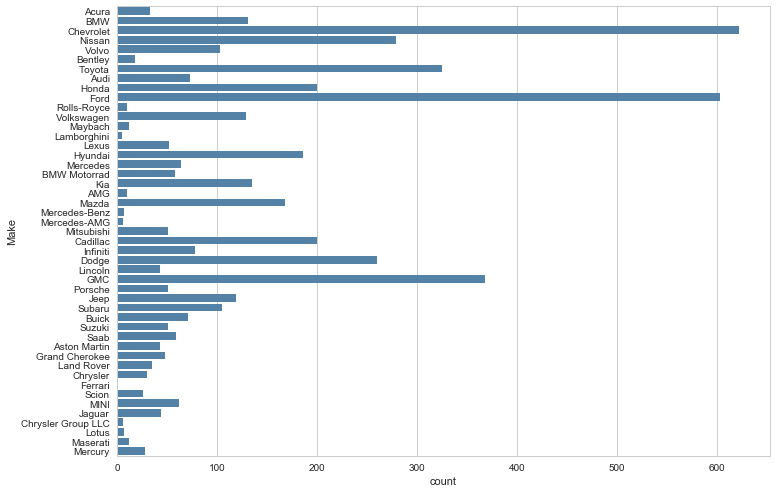

In [50]:
## bar plot
sns.countplot(y="Make", data=cars, color="steelblue");

It is clear to see that this dataset mainly consists of American makes. For example, Chevrolet, Ford and GMC have the most records, and the main Germany makes, like BMW, Audi and Mercedes-Benz have only a few records. 

Besides the origin, mpg is another key factor of vehicles. Here is the overall average city mpg for all cars in this dataset.

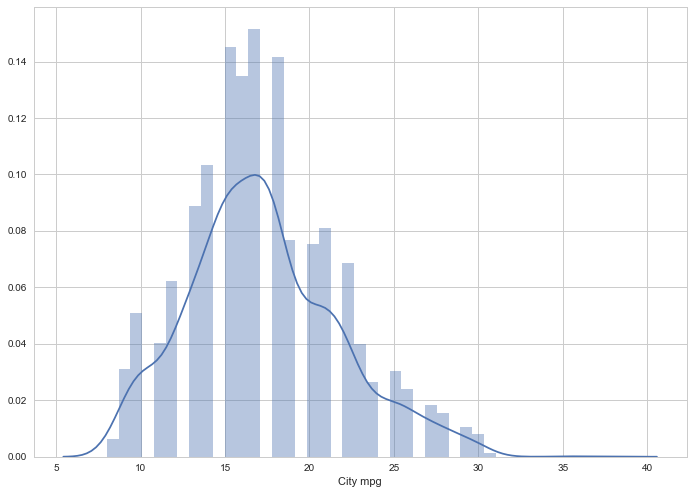

In [51]:
## histogram
sns.distplot(cars['City mpg'])

One can see that the most common city mpg for a car falls between 15 and 20.

It is reasonable to believe that the types of transmission and driveline will affct a vehicle's mpg. A faceted histogram will be useful to show such relationships.   

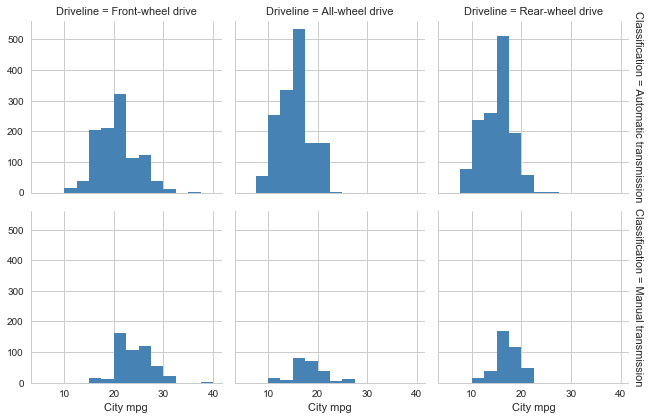

In [54]:
## facet histogram
g = sns.FacetGrid(cars, row="Classification", col="Driveline", margin_titles=True)
bins = np.linspace(5, 40, 15)
g.map(plt.hist, "City mpg", color="steelblue", bins=bins, lw=0)

According to the distribution, one can see that front-wheel drive vehicles tend to have higher average of city mpg (greater than 20) than all-wheel drive and rear-wheel drive vehicles. However, due to the lack of data, no conclusion can be drawed on the impact of transmission types on the mpg.  

A swarm plot can show the distribution of city mpg of different types of driveline more clearly. 

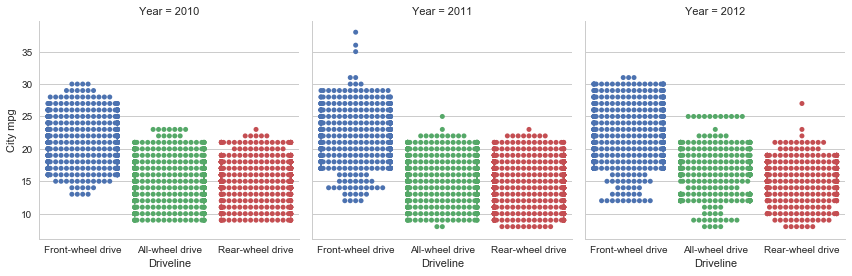

In [57]:
sns.factorplot(x="Driveline", y="City mpg",
               col="Year", data=cars, kind="swarm")

Based on the swarm plot, one can easily see that front-wheel drive vehicles have a higher average of city mpg. And all-wheel drive vehicles and rear-wheel drive vehicles have similar city mpg.

Driveline types may also affects the horsepower and torque of a vehicle other than mpg. Here is a scatter plot of horsepower and torque of all vehicles in the dataset.

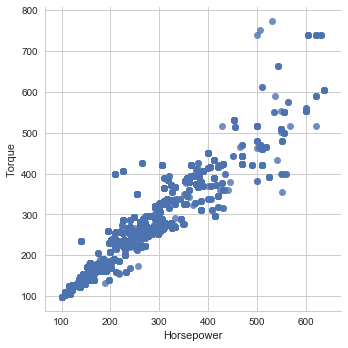

In [58]:
##bivarite scatter plot
sns.lmplot(x="Horsepower", y="Torque", data=cars, fit_reg=False);

From this plot, one can see that horsepower and torque has a positive relationship. 

And here is the same scatter plot with different types of driveline showed in different colors.

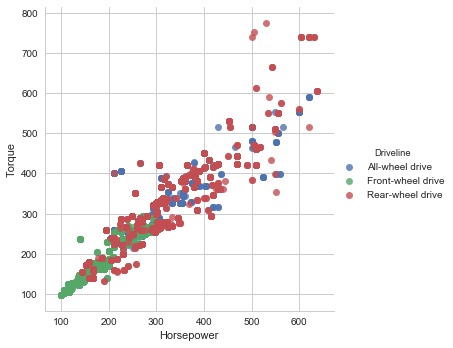

In [37]:
##trivariate scatter plot
sns.lmplot(x="Horsepower", y="Torque", hue='Driveline', data=cars, fit_reg=False);

One can see that front-wheel drive vehicles have smaller horsepower and torque, while rear-wheel drive vehicles tend to have the highest torque. 

However, in the above scatter plot, most dots representing all-wheel drive vehicles and real-wheel vehicles are overlapped. In order to distinguish whether they have similar distributions, a violin plot can be useful. 

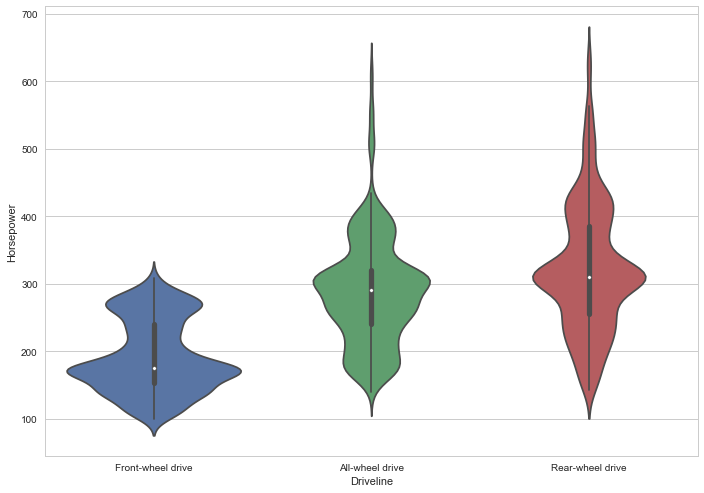

In [59]:
sns.violinplot(x=cars['Driveline'], y=cars['Horsepower'])

Based on the violin plot, one can see that all-wheel drive and rear-wheel drive vehicles do have similar distribution of horsepower. And front-wheel drive vehicles overall, of course, have lower horsepower. 